In [41]:
import numpy as np
from keras import Input, Model
from keras.src.layers import Dense
from matplotlib import pyplot as plt

# Defining means

In [42]:
mean1 = [0, 0, 0, 0, 0, 0, 0, 0]
mean2 = [4, 0, 0, 0, 0, 0, 0, 0]
mean3 = [0, 0, 0, 4, 0, 0, 0, 0]
mean4 = [0, 0, 0, 0, 0, 0, 0, 4]

# Creating data

In [43]:
samples = 10000
test_samples = int(samples * 0.001)

c1 = np.random.normal(mean1, 1, size=(samples, 8))
c1_test = np.random.normal(mean1, 1, size=(test_samples, 8))
c2 = np.random.normal(mean2, 1, size=(samples, 8))
c2_test = np.random.normal(mean2, 1, size=(test_samples, 8))
c3 = np.random.normal(mean3, 1, size=(samples, 8))
c3_test = np.random.normal(mean3, 1, size=(test_samples, 8))
c4 = np.random.normal(mean4, 1, size=(samples, 8))
c4_test = np.random.normal(mean4, 1, size=(test_samples, 8))

X = np.vstack((c1, c2, c3, c4))

# Creating the model

In [44]:
input_data = Input(shape=(8,))
encoded = Dense(2, activation='linear')(input_data)
decoded = Dense(8, activation='linear')(encoded)

autoencoder = Model(input_data, decoded)

autoencoder.compile(optimizer='adam',loss="mean_squared_error")

# Training stage

In [45]:
autoencoder.fit(X, X, epochs=50, batch_size=32, validation_split=0.1)

Epoch 1/50
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 1s 738us/step - loss: 2.2190 - val_loss: 0.8685
Epoch 2/50
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 1s 649us/step - loss: 1.1835 - val_loss: 0.9925
Epoch 3/50
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 1s 624us/step - loss: 0.8950 - val_loss: 0.9179
Epoch 4/50
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 1s 637us/step - loss: 0.8912 - val_loss: 0.8786
Epoch 5/50
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 1s 622us/step - loss: 0.8841 - val_loss: 0.8721
Epoch 6/50
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 1s 641us/step - loss: 0.8875 - val_loss: 0.8821
Epoch 7/50
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 1s 642us/step - loss: 0.8890 - val_loss: 0.8919
Epoch 8/50
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 1s 646us/step - loss: 0.8898 - val_loss: 0.8819
Epoch 9/50
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 1s 637us/step - loss: 0.8840 - val_loss: 0.8865
Epoch 10/50
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 1s 641us/step - loss: 0.8840 - val_loss: 0.8977
Epoch 11/50
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 1s 649us/step - loss: 0.8877 - val_loss: 0.9089
Epoch 12

# Encoding model

In [46]:
encoder = Model(input_data, encoded)

# Changing dimensions

In [47]:
encoded_data_m1 = encoder.predict(c1_test)
encoded_data_m2 = encoder.predict(c2_test)
encoded_data_m3 = encoder.predict(c3_test)
encoded_data_m4 = encoder.predict(c4_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


# Scatter plotting

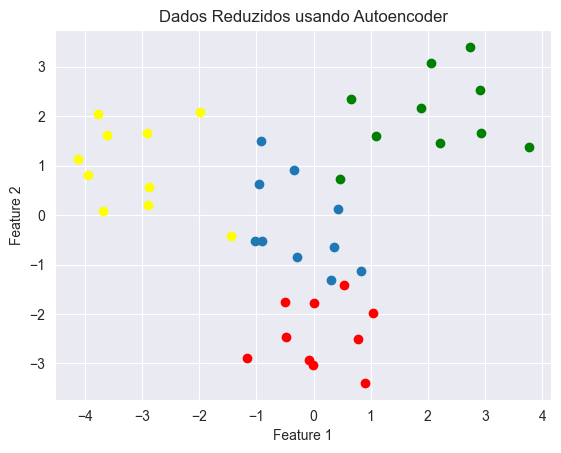

In [48]:
plt.scatter(encoded_data_m2[:, 0], encoded_data_m2[:, 1], c="yellow")
plt.scatter(encoded_data_m3[:, 0], encoded_data_m3[:, 1], c="green")
plt.scatter(encoded_data_m4[:, 0], encoded_data_m4[:, 1], c="red")
plt.scatter(encoded_data_m1[:, 0], encoded_data_m1[:, 1])
plt.title('Dados Reduzidos usando Autoencoder')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()